,Value,Definition
HyperParameter,,
N,3.0,Number of accidents
α,0.9,CVaR Quantil
λ,0.15,CVaR Weight in Z
τ,2.5,Risk-loading factor
Ti,1.0,Minimum indemnization
Tf,2.0,Maximum indemnization
M,100000000.0,Big M
p,0.1,Probability of accidents
Sample size,1300.0,Sample size


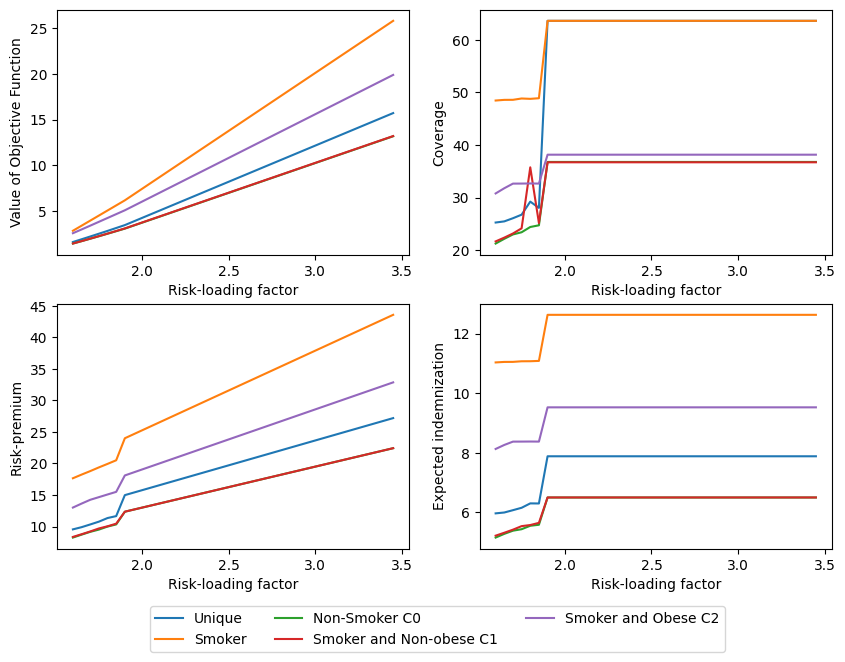

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

init = 1.6
stop = 3.5
step = 0.05
index = ['Unique', 'Smoker', 'Non-Smoker C0', 'Smoker and Non-obese C1', 'Smoker and Obese C2']

i=1
for Tao in np.round(np.arange(init,stop,step), 2).astype('str'):
    exec(f'coverage_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,4]')
    i=i+1
    
i=1
for Tao in np.round(np.arange(init,stop,step), 2).astype('str'):
    exec(f'z_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,6]')
    i=i+1
    
i=1
for Tao in np.round(np.arange(init,stop,step), 2).astype('str'):
    exec(f'expected_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,7]')
    i=i+1
    
i=1
for Tao in np.round(np.arange(init,stop,step), 2).astype('str'):
    exec(f'cvar_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,2]')
    i=i+1

# Vectors    
i=3
coverage = pd.concat([coverage_1, coverage_2], axis=1)
for p in np.round(np.arange(init+2*step,stop,step), 2).astype('str'):
    exec(f'coverage = pd.concat([coverage, coverage_{i}], axis=1)')
    i=i+1
    
i=3
expected = pd.concat([expected_1, expected_2], axis=1)

for p in np.round(np.arange(init+2*step,stop,step), 2).astype('str'):
    exec(f'expected = pd.concat([expected, expected_{i}], axis=1)')
    i=i+1
    
i=3
cvar = pd.concat([cvar_1, cvar_2], axis=1)
for p in np.round(np.arange(init+2*step,stop,step), 2).astype('str'):
    exec(f'cvar = pd.concat([cvar, cvar_{i}], axis=1)')
    i=i+1
    
i=3
z = pd.concat([z_1, z_2], axis=1)
for p in np.round(np.arange(init+2*step,stop,step), 2).astype('str'):
    exec(f'z = pd.concat([z, z_{i}], axis=1)')
    i=i+1
    
fig, axs = plt.subplots(2,2, figsize=(10,7))

for i in range(5):
    axs[0,1].plot(np.arange(init,stop,step), coverage.values.T[:,i], label = index[i])

axs[0,1].set(xlabel='Risk-loading factor', ylabel='Coverage')

for i in range(5):
    axs[0,0].plot(np.arange(init,stop,step), z.values.T[:,i], label = index[i])
    
axs[0,0].set(xlabel='Risk-loading factor', ylabel='Value of Objective Function')

for i in range(5):
    axs[1,0].plot(np.arange(init,stop,step), cvar.values.T[:,i], label = index[i])
axs[1,0].set(xlabel='Risk-loading factor', ylabel='Risk-premium')

for i in range(5):
    axs[1,1].plot(np.arange(init,stop,step), expected.values.T[:,i], label = index[i])
axs[1,1].set(xlabel='Risk-loading factor', ylabel='Expected indemnization')
axs[1,1].legend(ncols=3, loc='lower center', bbox_to_anchor=(-0.12, -0.45))

##
HyperP = {}
HyperP["N"] = 3
HyperP["α"] = 0.90
HyperP["λ"] = 0.15
HyperP["τ"] = 2.5
HyperP["Ti"] = 1.0
HyperP["Tf"] = 2.0
HyperP["M"] = [1e8, 1e8, 1e8]
HyperP["p"] = 0.1
HyperP["Sample size"] = 1300

params = pd.DataFrame(HyperP).T.iloc[:,0:1].astype('str')
definition = pd.DataFrame(['Number of accidents', 'CVaR Quantil', 'CVaR Weight in Z',
                           'Risk-loading factor', 'Minimum indemnization',
                           'Maximum indemnization', 'Big M', 'Probability of accidents',
                           'Sample size'])
Table = pd.concat([params.reset_index(), definition], axis=1)
Table.columns = ['HyperParameter', 'Value', 'Definition']
Table = Table.set_index('HyperParameter')

display(Table)